In [2]:
import seaborn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import os

import sys
# import cv2
# import serial.tools.list_ports
# import serial
import time
import random
import statistics

import matplotlib.patches as mpatches
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Input,Dense,Dropout
import sklearn
from sklearn.metrics import confusion_matrix
# import statsmodels.api as sm

In [3]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras import utils, optimizers
from tensorflow import lite

from locale import normalize


In [31]:
# Importar las librerias necesaria
import pandas as pd
import numpy as np
import os
import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense, Dropout
import sklearn
from sklearn.metrics import confusion_matrix
from tensorflow import lite

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn

In [90]:
Folderbydata = 'data_all_not3'  
files = os.listdir( Folderbydata )

corte = 0 # corte de 5 primeros samples
print(files)

['S1T1R1.csv', 'S1T1R10.csv', 'S1T1R11.csv', 'S1T1R12.csv', 'S1T1R13.csv', 'S1T1R14.csv', 'S1T1R15.csv', 'S1T1R16.csv', 'S1T1R17.csv', 'S1T1R18.csv', 'S1T1R19.csv', 'S1T1R2.csv', 'S1T1R20.csv', 'S1T1R21.csv', 'S1T1R22.csv', 'S1T1R23.csv', 'S1T1R24.csv', 'S1T1R25.csv', 'S1T1R3.csv', 'S1T1R4.csv', 'S1T1R5.csv', 'S1T1R6.csv', 'S1T1R7.csv', 'S1T1R8.csv', 'S1T1R9.csv', 'S1T2R1.csv', 'S1T2R10.csv', 'S1T2R11.csv', 'S1T2R12.csv', 'S1T2R13.csv', 'S1T2R14.csv', 'S1T2R15.csv', 'S1T2R16.csv', 'S1T2R17.csv', 'S1T2R18.csv', 'S1T2R19.csv', 'S1T2R2.csv', 'S1T2R20.csv', 'S1T2R21.csv', 'S1T2R22.csv', 'S1T2R23.csv', 'S1T2R24.csv', 'S1T2R25.csv', 'S1T2R3.csv', 'S1T2R4.csv', 'S1T2R5.csv', 'S1T2R6.csv', 'S1T2R7.csv', 'S1T2R8.csv', 'S1T2R9.csv', 'S1T4R1.csv', 'S1T4R10.csv', 'S1T4R11.csv', 'S1T4R12.csv', 'S1T4R13.csv', 'S1T4R14.csv', 'S1T4R15.csv', 'S1T4R16.csv', 'S1T4R17.csv', 'S1T4R18.csv', 'S1T4R19.csv', 'S1T4R2.csv', 'S1T4R20.csv', 'S1T4R21.csv', 'S1T4R22.csv', 'S1T4R23.csv', 'S1T4R24.csv', 'S1T4R25.csv',

In [91]:
#datosmaximosenbase = []
alldatos =[]
#rmsdatos=[]
RMSdatos=[]
maxdatos = []
mindatos = []
max_min_data = []
tarea_data=[]
print(len(files))
for file in files:
    #print(file[3])
    data = []
    csv = open(Folderbydata +'/'+file, "r")
    try:
        data = [int(element) for element in csv.read().splitlines()]
        #print(data)
        # if(len(data)<300):
        #     print(len(data), csv)
    except (ValueError, TypeError):
        #data = []
        for row in open(Folderbydata+'/'+file, "r"):
            #print(row)
            try:
                int(row)
            except (ValueError, TypeError):
                #print('dato'+row)
                #break
                row = 0
            finally:
                row = int(row)
                data.append(row)
    #print(data)
    # pregunto si el archivo tiene datos
    if len(data) > 0:
        data = [data[x] for x in range(0,len(data)) if x >= corte]# cambia el tamaño de la lista cortando los primeros 5 elementos
        #print(len(data))
        #print(data)
        # if (file.split('.')[0].split('_')[1].startswith('B')):
        #     datosmaximosenbase.append(max(data))
        # else:
        #     pass
        alldatos.append(data)
        #rmsdatos.append(np.mean(data))
        RMSdatos.append(np.sqrt(np.mean(np.square(data))))
        maxdatos.append(max(data))
        mindatos.append(min(data))

        max_min_data.append([max(data),min(data)])
        if(file[3]=='4'):
            tarea_data.append(int(file[3])-2)
        else:
            tarea_data.append(int(file[3])-1)
        
        
        
    else:
        print('El archivo '+file+' tiene problemas')

    csv.close()

# print(datosmaximosenbase)
# prombase = statistics.mean(datosmaximosenbase)
# print(prombase)

# print(len(maxdatos))
# print(maxdatos)
# print(len(mindatos))
# print(mindatos)
# print(len(alldatos))

# print(len(max_min_data))
# print(max_min_data)
# print(len(tarea_data))
# print(tarea_data)

#print(alldatos)


150


In [184]:
#Convertir a Array datos de interes
#X -> feautures         Y -> Clases
X = np.array(max_min_data)
Y = np.array(tarea_data)
print(X.shape)
print(X)
print(Y.shape)
print(Y)
##2 ES MI TAREA 4
# Y=Y.reshape((200,1))
# print(Y)
# print(Y.shape)

(150, 2)
[[2524 2334]
 [2550 2328]
 [2518 2346]
 [2527 2334]
 [2513 2346]
 [2511 2334]
 [2530 2334]
 [2512 2353]
 [2512  424]
 [2511 2351]
 [2518 2333]
 [2526 2343]
 [2506  435]
 [2528 2348]
 [2517 2325]
 [2540 2319]
 [2528 2308]
 [2518 2315]
 [2538 2314]
 [2524 2344]
 [2536 2319]
 [2514 2340]
 [2514 2333]
 [2520 2370]
 [2538 2343]
 [2652 2178]
 [2670 2176]
 [2815 2062]
 [2872 2193]
 [2624 2160]
 [2671    9]
 [2624 2169]
 [2617 2217]
 [2671 2098]
 [2767 2091]
 [2645 2175]
 [2642 2211]
 [2671 2095]
 [2655 2216]
 [2808 2168]
 [2820 2072]
 [2648 2176]
 [2648 2232]
 [2634 2142]
 [2595 2268]
 [2582 2191]
 [2623 2287]
 [2610 2216]
 [2614 2240]
 [2814 2136]
 [2689 2205]
 [2744  417]
 [2898 2240]
 [2629 2063]
 [2846 2025]
 [2739  396]
 [2735 1801]
 [2861 2037]
 [2815 2127]
 [2639 2230]
 [2714 2221]
 [2834 2170]
 [2880 1987]
 [2908 2159]
 [2778 2196]
 [2864 1578]
 [2912 2179]
 [2952 1833]
 [2856 2180]
 [3119 2127]
 [2749 2032]
 [2751 2108]
 [2792 1934]
 [2736 2094]
 [2816 2001]
 [2490 2380]
 [2

In [183]:
y = utils.to_categorical(Y)
print(y)
print(len(y))

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1.

In [94]:

# Definir una semilla.
RANDOM_STATE = 42

# Establecer el porcentaje para dividir la data.
TRAIN_SPLIT = 0.6
VALID_TEST_SPLIT = 0.2
assert(TRAIN_SPLIT + (2*VALID_TEST_SPLIT) == 1)

# Definir la taza de aprendizaje.
LEARNING_RATE = 0.001

# Definir el número de épocas.
EPOCHS = 200

# Definir el tamaño del batch.
BATCH_SIZE = 64

In [53]:
# Separar los datos en TRAINING, TESTING Y VALIDATION.
TRAIN_SPLIT =  int(TRAIN_SPLIT * 200.0)

TEST_SPLIT = int(VALID_TEST_SPLIT * 200.0 + TRAIN_SPLIT)
print(TRAIN_SPLIT)
print(VALID_TEST_SPLIT * len(y))
print(TEST_SPLIT)
x_train, x_test, x_validate = np.split(X, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y, [TRAIN_SPLIT, TEST_SPLIT])
print(x_validate)
# Asegurar que la división de los datos fue exitosa.
assert(x_train.shape[0] + x_test.shape[0] + x_validate.shape[0] == len(y))

10066329599999997719107772314096951979397551591381794816
40.0
10066329599999997719107772314096951979397551591381794816
[]


In [189]:
# Separar los datos en datos de entrenamiento y de testeo.
# En este caso se escogió una proporción de 80% - 20%, para entrenamiento y testeo, respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_test)
print(y_test)

(120, 2) (30, 2) (120,) (30,)
[[2576 2077]
 [2880 1987]
 [2671 2098]
 [2684 2161]
 [2512 2353]
 [2977 1883]
 [2820 2072]
 [2614 2257]
 [2502 2346]
 [2751 2108]
 [3378  322]
 [2744  417]
 [2736 2094]
 [2846 2025]
 [2908 2159]
 [2671 2095]
 [2486   28]
 [2477 2378]
 [2582 2191]
 [2528 2308]
 [2704   93]
 [2912 2179]
 [2538 2343]
 [2512  424]
 [3662 1372]
 [2514 2333]
 [2595 2268]
 [2506 2370]
 [2620 2273]
 [2670 2176]]
[1 2 1 1 0 1 1 0 0 2 2 2 2 2 2 1 0 0 1 0 1 2 0 0 2 0 1 0 0 1]


In [78]:
# Definir la arquitectura del modelo
model = Sequential()
model.add(Dense(60, input_shape = (x_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, input_shape = (x_train.shape[1],),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [79]:
# Definir la función de optimización y sus hiperparámetros.
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
# Definir la función de pérdida y compilar el modelo.
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Entrenar el modelo
start = time.time()
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE,
                            validation_data=(x_validate, y_validate))
stop = time.time()
print(f"Total training time: {stop - start}s")
test_results = model.evaluate(x_test, y_test, verbose=1)

ValueError: Data cardinality is ambiguous:
  x sizes: 200
  y sizes: 160
Make sure all arrays contain the same number of samples.

KeyError: 'precision_4'

<Figure size 1440x1440 with 0 Axes>

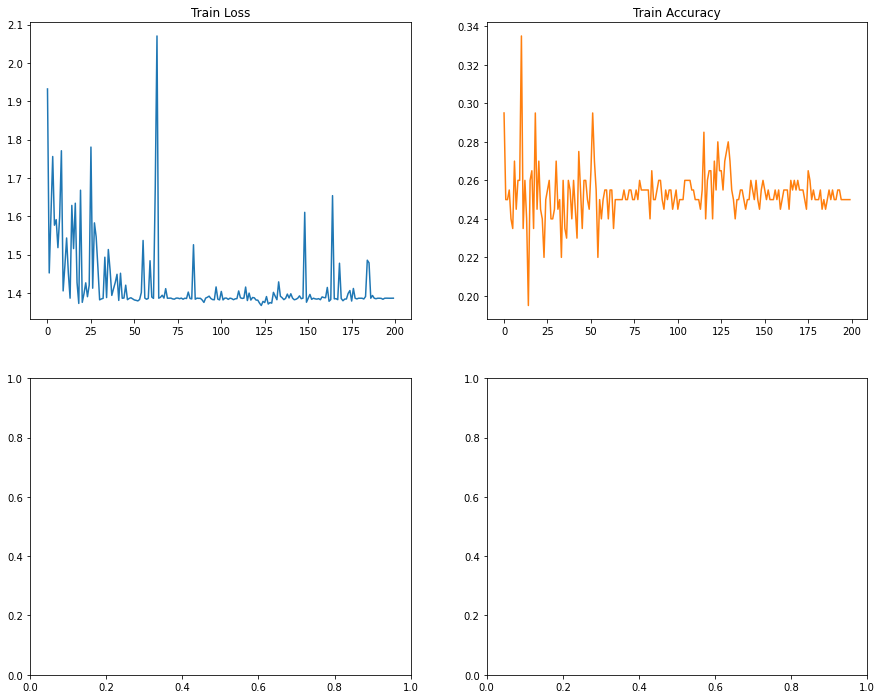

In [26]:
x = [i for i in range (0,len(history.history["loss"]))]

plt.figure(figsize=(20, 20))
fig, axs = plt.subplots(2, 2, figsize=(15,12))
axs[0, 0].plot(x, history.history["loss"])
axs[0, 0].set_title('Train Loss')
axs[0, 1].plot(x, history.history["accuracy"], 'tab:orange')
axs[0, 1].set_title('Train Accuracy')
axs[1, 0].plot(x, history.history["precision_4"], 'tab:green')
axs[1, 0].set_title('Train Precision')
axs[1, 1].plot(x, history.history["recall_4"], 'tab:red')
axs[1, 1].set_title('Train Recall')

In [29]:
# Testear el modelo
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test, axis=-1)

# Definir la matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=[0,1,2,3])
df_cm = pd.DataFrame(cm, range(cm.shape[0]), range(cm.shape[0]))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})

plt.show()

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [190]:





# Definir la arquitectura del modelo
# En este caso se definió una red neuronal de 3 capas intermedias, con una función de activación softmax. z
model = Sequential()
model.add(Dense(4, input_shape = (X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3,activation='softmax'))
"""model = Sequential()
model.add(Dense(60, input_shape = (X_train.shape[1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30, input_shape = (X_train.shape[1],),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))"""

"model = Sequential()\nmodel.add(Dense(60, input_shape = (X_train.shape[1],), activation='relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(30, input_shape = (X_train.shape[1],),activation='relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(10,activation='relu'))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(3,activation='softmax'))"

In [191]:
# Escoger el optimizador del modelo y sus parámetros.
optimizer = optimizers.Adam(learning_rate=LEARNING_RATE)


In [192]:
# Especificar la configuración de entrenamiento.
# La función de pérdida escogida, “categorical crossentropy”, funciona con vectores de clases binarios, 
# por esta razón se hizo la tranformación y = utils.to_categorical(Y).
#model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanAbsoluteError(), metrics=['accuracy'])


In [193]:
# Entrenar nuestro modelo.
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.3417
Epoch 2/100
4/4 [==============================] - 0s 833us/step - loss: 0.9000 - accuracy: 0.3417
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.3417
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.3417
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.3417
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.3417
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.3417
Epoch 8/100
4/4 [==============================] - 0s 833us/step - loss: 0.9000 - accuracy: 0.3417
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9000 - accuracy: 0.3417
Epoch 10/100
4/4 [==============================] - 0s 833us/step - loss: 0.9000 - accuracy: 0.3417
Epoch 11/100
4/4 [=====

In [194]:
results = model.evaluate(X_test, y_test, verbose=1)
print(f"Model accuracy: {results[1]*100} %")

1/1 [==============================] - 0s 85ms/step - loss: 0.8444 - accuracy: 0.3333
Model accuracy: 33.33333432674408 %


In [14]:
# #normalizacion de los datos
# for x in range(0,len(alldatos)):
#     for y in range(0,len(alldatos[x])):
#         if alldatos[x][y] == 0:
#             print("hola")
#             print(alldatos[x][y])
#             #alldatos[x][y] = prombase
#         #alldatos[x][y] = alldatos[x][y]/prombase

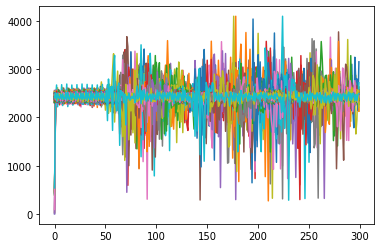

In [15]:
# grafica de los datos
for x in range(0,len(alldatos)):
    plt.plot(alldatos[x])
plt.show()

In [22]:
datosinput = np.array(alldatos)
datosmin = np.array(mindatos)
datosmax = np.array(maxdatos)

print(datosinput)
print(datosinput.shape)
#datosrms
print(datosmin.shape)
#datosRMS
print(datosmax.shape)

[[2447 2386 2426 ... 2399 2478 2394]
 [2417 2481 2420 ... 2388 2490 2408]
 [2415 2462 2415 ... 2395 2422 2449]
 ...
 [2415 2497 2376 ... 2371 2401 2466]
 [2452 2386 2479 ... 2523 2568 2204]
 [2408 2506 2337 ... 2344 2472 2495]]
(200, 300)
(200,)
(200,)


In [31]:
allresults = []
tareasSTR = []
#########
# Down                  High 
#0     H                #66.6  L
#16.6  N    #50  B      #83.3  N
#33.3  L                #100   H
#########
for x in range(0,len(files)):
    text = files[x][3]
    if text.startswith('1'):
        #print("tarea1")
        allresults.append(50)
        tareasSTR.append('Tarea1')
    else :
        #print(text[len(text)-2:])
        # switch case
        if text.startswith('2'):
            allresults.append(100)
            tareasSTR.append('Tarea2')
        elif text.startswith('3'):
            allresults.append(83.3)
            tareasSTR.append('Tarea3')
        elif text.startswith('4'):
            allresults.append(66.6)
            tareasSTR.append('Tarea4')
# corte de los datos para el entrenamiento

#datosoutput = [allresults[x] for x in range(0,len(allresults)) if x >= corte]
#tareasSTR = [tareasSTR[x] for x in range(0,len(tareasSTR)) if x >= corte]

datosoutput = np.array(allresults)
print(datosoutput.shape)
tareasSTR = np.array(tareasSTR)
print(tareasSTR.shape)
print(datosoutput)
print(tareasSTR)

(200,)
(200,)
[ 50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.
  50.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
 100.  100.   83.3  83.3  83.3  83.3  83.3  83.3  83.3  83.3  83.3  83.3
  83.3  83.3  83.3  83.3  83.3  83.3  83.3  83.3  83.3  83.3  83.3  83.3
  83.3  83.3  83.3  66.6  66.6  66.6  66.6  66.6  66.6  66.6  66.6  66.6
  66.6  66.6  66.6  66.6  66.6  66.6  66.6  66.6  66.6  66.6  66.6  66.6
  66.6  66.6  66.6  66.6  50.   50.   50.   50.   50.   50.   50.   50.
  50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.   50.
  50.   50.   50.   50.   50.  100.  100.  100.  100.  100.  100.  100.
 100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.  100.
 100.  100.  100.  100.  100.  100.   83.3  83.3  83.3  83.3  83.3  83.3
  83.3  83.3  83.3  83.3  83.3  83.3  83.3  8